Download events (/events/) & matches (/matches/) & players (./players.json) from https://figshare.com/collections/Soccer_match_event_dataset/4415000/3

In [1]:
import pandas as pd
import numpy as np
from collections import ChainMap
competition = 'England'
#events = pd.read_json('events/events_{}.json'.format(competition)).set_index('id')
matches = pd.read_json('matches/matches_{}.json'.format(competition)).set_index('wyId')
players = pd.read_json('players/players.json').set_index('wyId')

# Matches 

In [2]:
def filter_last_minutes_events(events, matchId, minutes=10):
    return events[(events['matchId']==matchId) & (events['matchPeriod']=='2H') & (events['eventSec']>(45-minutes)*60)]

In [3]:
minutes = 10

In [4]:
def get_shots_season(events, shotsList):
    events_shot = events[events.eventName == 'Shot']
    fkShots = ['Free kick shot', 'Penalty']
    events_fk = events[ (events.eventName == 'Free Kick') & (events.subEventName.isin(fkShots) )]
    events_shot['Shots'] = events_shot.apply(lambda _: '1', axis=1)
    events_fk['FreeKicks'] = events_fk.apply(lambda _: '1', axis=1)
    fkShotsMatch = events_fk[['matchId','FreeKicks']].groupby('matchId').count()
    shotsMatch = events_shot[['matchId','Shots']].groupby('matchId').count()
    shots = pd.merge(fkShotsMatch, shotsMatch, on ='matchId')
    shots['Total'] = shots.FreeKicks + shots.Shots
    #print(shots.Total)
    shots_array = np.array(shots.Total)
    shotsList.append([np.mean(shots_array), np.std(shots_array)])
    return

shots = []
countries = ['France', 'Spain', 'England', 'Germany', 'Italy']
for country in countries:
    events = pd.read_json('events/events_{}.json'.format(country)).set_index('id')
    get_shots_season(events,shots)
    #del events
shots

/home/alfons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/alfons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alfons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

[[24.009708737864077, 5.4710094658445385],
 [22.725806451612904, 5.393452885402371],
 [23.92105263157895, 5.014018732949925],
 [24.35211267605634, 5.372767163389732],
 [24.693602693602692, 5.3908258036700305]]

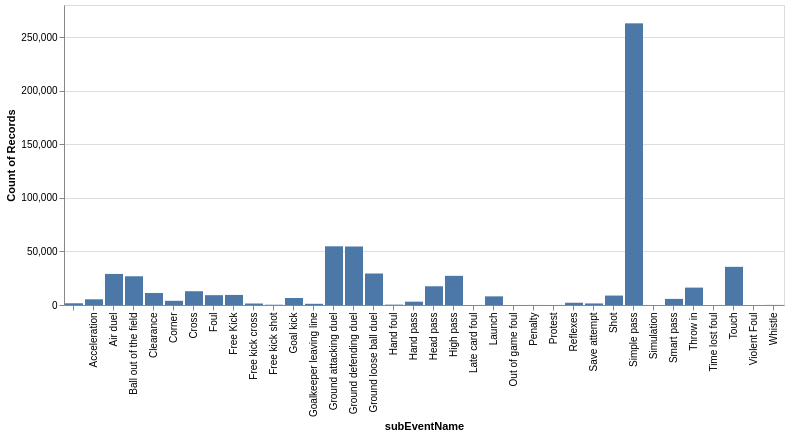

In [5]:
# import altair as alt
# alt.data_transformers.enable('json')
# alt.Chart(events).mark_bar().encode(
#     x="subEventName:N",
#     y='count(subEventName):Q'
# )

In [6]:
print(len(matches))
def get_goals_season(matches, goalList):
    goalArray = []
    for i in range(len(matches)):
        scoreString = np.array(matches.label.iloc[i].split())[-3:]
        goalArray.append(int(scoreString[0]) + int(scoreString[2]))
    goalList.append([np.mean(goalArray), np.std(goalArray)])
    return
    
countries = ['France', 'Spain', 'England', 'Germany', 'Italy']
goals = []
for country in countries:
    matches = pd.read_json('matches/matches_{}.json'.format(country)).set_index('wyId')
    get_goals_season(matches, goals)
    print('Country')
goals

380
Country
Country
Country
Country
Country


[[2.718421052631579, 1.619674311504094],
 [2.694736842105263, 1.7774830472832932],
 [2.6789473684210527, 1.6629330294355849],
 [2.7941176470588234, 1.6588339590827734],
 [2.6763157894736844, 1.645717602322099]]

In [9]:
shots = np.array(shots)
goals = np.array(goals)
shotsGoals = pd.DataFrame({'Country':countries , 'Goals':goals[:,0], 'Shots':shots[:,0]})
shotsGoals.head()

,Country,Goals,Shots
0,France,2.718421,24.009709
1,Spain,2.694737,22.725806
2,England,2.678947,23.921053
3,Germany,2.794118,24.352113
4,Italy,2.676316,24.693603


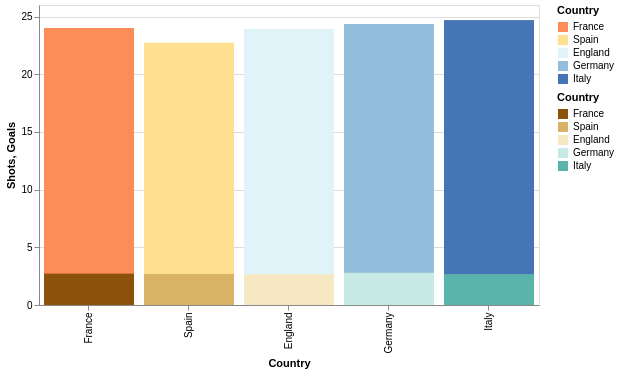

In [10]:
import altair as alt
#alt.data_transformers.enable('json')
base = alt.Chart(shotsGoals,width=500, height=300)

one = base.mark_bar().encode(
    x = alt.X('Country', sort=countries),
    #y = 'Shots:Q',
    y ='Goals:Q',
    color = alt.Color('Country:N',
    scale=alt.Scale(domain=['France', 'Spain', 'England', 'Germany', 'Italy'],
    range=['#8c510a','#d8b365','#f6e8c3','#c7eae5','#5ab4ac','#01665e']))
    #color = 'Country:N'
)
two = base.mark_bar().encode(
    x= alt.X('Country', sort=countries),
    y='Shots:Q',
    #color = 'Country:N'
    color = alt.Color('Country:N',
    scale=alt.Scale(domain=['France', 'Spain', 'England', 'Germany', 'Italy'],
    range=['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4'])),

)

alt.layer(
two, one
).resolve_scale('independent')


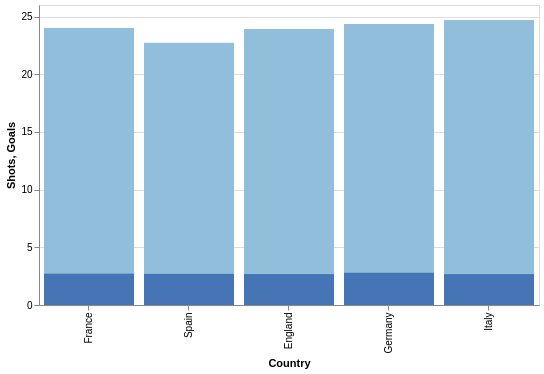

In [17]:
import altair as alt
#alt.data_transformers.enable('json')
base = alt.Chart(shotsGoals,width=500, height=300)
colorPalette = ['#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
goals = base.mark_bar( color = colorPalette[-1]).encode(
    x = alt.X('Country', sort=countries),
    #y = 'Shots:Q',
    y ='Goals:Q',
    #color = 'Country:N'
)
shots = base.mark_bar( color = colorPalette[-2] ).encode(
    x= alt.X('Country', sort=countries),
    y='Shots:Q',
    #color = 'Country:N'

)

alt.layer(
shots, goals
).resolve_scale('independent')


# Classification

In [ ]:
def get_goals_per_game(teamsData):
    keys_team_data = list(teamsData.keys())
    return {keys_team_data[0]:teamsData[keys_team_data[0]]['score'],keys_team_data[1]:teamsData[keys_team_data[1]]['score']}

In [ ]:
def get_points_per_score(teamsData): #{'3783': 2, '3767': 1}    
    keys_team_data = list(teamsData.keys())    
    score_match = get_goals_per_game(teamsData)
    if score_match[keys_team_data[0]]==score_match[keys_team_data[1]]:
        return {keys_team_data[0]:1,keys_team_data[1]:1}
    if score_match[keys_team_data[0]]>score_match[keys_team_data[1]]:
        return {keys_team_data[0]:3,keys_team_data[1]:0}
    if score_match[keys_team_data[0]]<score_match[keys_team_data[1]]:
        return {keys_team_data[0]:0,keys_team_data[1]:3}

In [ ]:
def get_points_round(round_matches):
    matches_selected = round_matches.sort_values('gameweek')
    dicts = matches_selected.apply(lambda x: get_points_per_score(x['teamsData']), axis=1)
    return dict(ChainMap(*list(dicts)))

In [ ]:
def get_points_league(matches):
    all_rounds = {}
    for gameweek, matches_played in matches.groupby('gameweek'):
        all_rounds[gameweek]=get_points_round(matches_played)
    return pd.DataFrame.from_dict(all_rounds)

In [ ]:
# points = get_points_league(matches)

In [ ]:
def get_points_aggregated_by_round(matches):
    points = get_points_league(matches)
    for round_i in range(2,len(points.columns)+1):
        points[round_i]=points[[round_i-1,round_i]].sum(axis=1)
    return points

In [ ]:
# points_agg = get_points_aggregated_by_round(matches)

In [ ]:
def get_classification_by_round(matches):
    points_agg = get_points_aggregated_by_round(matches)
    return points_agg.rank(method='first',ascending=False).astype(int)

In [ ]:
#classification = get_classification_by_round(matches)

In [ ]:
def get_frequency_of_position_changes(matches):
    classification = get_classification_by_round(matches)
    all_ranks = [rank for team in classification.values
         for rank in [rank for i, rank in enumerate(team) 
            if i==0 or team[i-1]!=rank]]
    unique, counts = np.unique(all_ranks, return_counts=True)
    return pd.Series(dict(zip(unique, counts)))

In [ ]:
import matplotlib.pyplot
%matplotlib inline
get_frequency_of_position_changes(matches).plot.barh()

In [ ]:
# win / month

# Players

In [90]:
playerProfiles = pd.read_json('players/players.json')#.set_index('Id')    
players = pd.read_json('players/playerank.json')#.set_index('Id')
players.head()

,goalScored,matchId,minutesPlayed,playerId,playerankScore,roleCluster
0,0,2057991,90,10014,0.0053,right CB
1,0,2057992,41,10014,0.0009,right CB
2,0,2057998,90,100140,-0.0013,central MF
3,0,2058000,90,100140,0.0031,left CB
4,0,2499869,90,10108,0.0035,right CB


In [91]:
playerProfiles.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


In [88]:
playerRank = players.groupby('playerId').mean()
playerRank.head()

,goalScored,matchId,minutesPlayed,playerankScore
playerId,,,,
12,0.000000,2.057976e+06,90.000000,0.010700
36,0.041667,2.221588e+06,90.000000,0.008550
38,0.000000,2.499824e+06,86.750000,0.001000
45,0.000000,2.576110e+06,57.600000,0.001180
48,0.021739,2.372222e+06,89.217391,0.011824


In [89]:
import altair as alt

len(playerRank)

2719